<a href="https://colab.research.google.com/github/ssatti0/Other_projects/blob/master/PlantClassification_Keras_03from_Directory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tensorflow as tf
import glob as glob
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass  
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

plt.rcParams['figure.figsize'] = (12, 9)
block_plot = False

# Fix seeds for reproducibility.
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE) 

## **1. Import Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

zip_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/PlantClassification_dataset.zip'
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall("./")
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [5]:
# Class names.
class_names = sorted([f for f in os.listdir('/content/Plants_2/train') if not f.startswith('.')])

for i in range(len(class_names)):
    print(i, class_names[i])

0 Alstonia Scholaris diseased (P2a)
1 Alstonia Scholaris healthy (P2b)
2 Arjun diseased (P1a)
3 Arjun healthy (P1b)
4 Bael diseased (P4b)
5 Basil healthy (P8)
6 Chinar diseased (P11b)
7 Chinar healthy (P11a)
8 Gauva diseased (P3b)
9 Gauva healthy (P3a)
10 Jamun diseased (P5b)
11 Jamun healthy (P5a)
12 Jatropha diseased (P6b)
13 Jatropha healthy (P6a)
14 Lemon diseased (P10b)
15 Lemon healthy (P10a)
16 Mango diseased (P0b)
17 Mango healthy (P0a)
18 Pomegranate diseased (P9b)
19 Pomegranate healthy (P9a)
20 Pongamia Pinnata diseased (P7b)
21 Pongamia Pinnata healthy (P7a)


In [6]:
def get_all_image_paths(dir_path):

    # Retrieve all the images paths.
    image_paths = glob.glob(f"{dir_path}/train/*/*", recursive=True)
    return image_paths

## 2. Visualize

In [7]:
def display_dataset_samples(image_paths):

    plt.figure(figsize=(18, 12))
    num_rows = 4
    num_cols = 6
    for i in range(num_rows*num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        
        # Generate a random index.
        random_idx = random.choice(list(range(0, len(image_paths))))
        image = plt.imread(image_paths[random_idx])
        label = image_paths[random_idx].split('/')[-2]
        plt.imshow(image)
        plt.axis('off')
        plt.title(label)
        
    plt.show(block=block_plot)

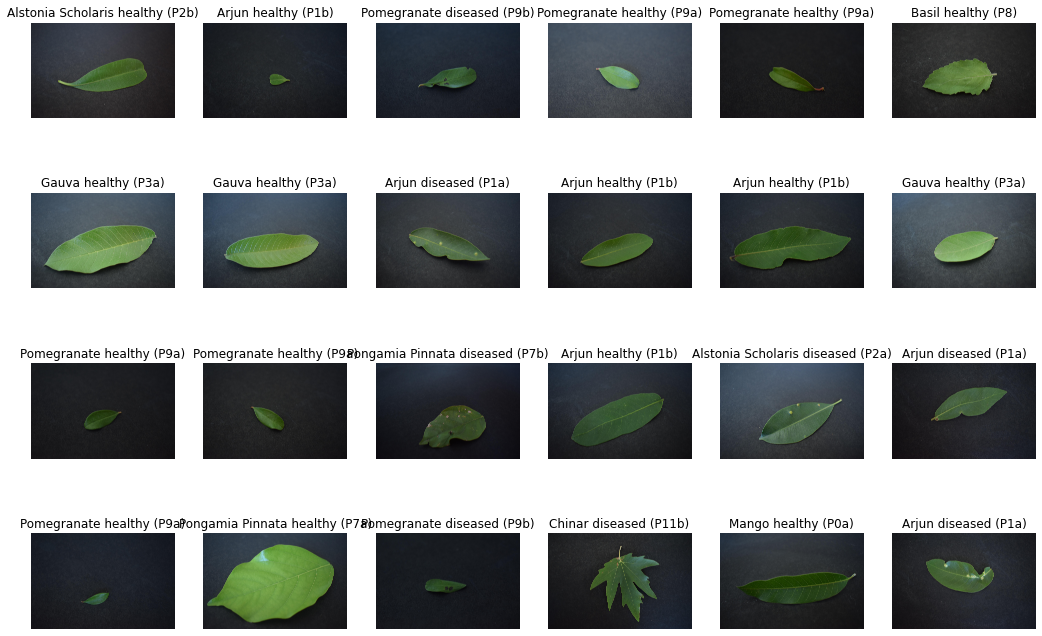

In [8]:
# Get all the image paths.
image_paths = get_all_image_paths('/content/Plants_2')

# Display several random images from the dataset.
display_dataset_samples(image_paths)

### **Set Config Parameters:**

In [9]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 22
    IMG_HEIGHT:   int = 224
    IMG_WIDTH:    int = 224
    NUM_CHANNELS: int = 3
    BATCH_SIZE:   int = 32
    DATA_ROOT:    str = '/content/Plants_2'

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:         int   = 21
    LEARNING_RATE:  float = 0.001
    #CHECKPOINT_DIR: str   = '/content/drive/MyDrive/Colab Notebooks/Datasets/saved_models_plantclassif'
    
data_config = DatasetConfig()
training_config = TrainingConfig()

# Set data paths.
train_path = os.path.join(data_config.DATA_ROOT, "train")
valid_path = os.path.join(data_config.DATA_ROOT, "valid")

Create BatchDataset Objects

In [10]:
input_shape = (data_config.IMG_HEIGHT, data_config.IMG_WIDTH)
batch_size = data_config.BATCH_SIZE

train_dataset = image_dataset_from_directory(directory=train_path, 
                                             image_size=input_shape, 
                                             batch_size=batch_size,
                                             color_mode='rgb',
                                             seed=SEED_VALUE,
                                             label_mode='categorical',  
                                            )

valid_dataset = image_dataset_from_directory(directory=valid_path, 
                                             image_size=input_shape, 
                                             batch_size=batch_size,
                                             color_mode='rgb',
                                             seed=SEED_VALUE,
                                             label_mode='categorical',
                                            )

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


## Inspect BatchObjects

In [11]:
# Print the shape of the data and the aassociated labels.
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

# Or use the take() method as shown below to retrieve the first batch only. 
# print('\n')
# for data_batch, labels_batch in train_dataset.take(1):
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 22)


In [12]:
# You can use the object attribute (class_names) to access the class names in the dataset.
valid_dataset.class_names

['Alstonia Scholaris diseased (P2a)',
 'Alstonia Scholaris healthy (P2b)',
 'Arjun diseased (P1a)',
 'Arjun healthy (P1b)',
 'Bael diseased (P4b)',
 'Basil healthy (P8)',
 'Chinar diseased (P11b)',
 'Chinar healthy (P11a)',
 'Gauva diseased (P3b)',
 'Gauva healthy (P3a)',
 'Jamun diseased (P5b)',
 'Jamun healthy (P5a)',
 'Jatropha diseased (P6b)',
 'Jatropha healthy (P6a)',
 'Lemon diseased (P10b)',
 'Lemon healthy (P10a)',
 'Mango diseased (P0b)',
 'Mango healthy (P0a)',
 'Pomegranate diseased (P9b)',
 'Pomegranate healthy (P9a)',
 'Pongamia Pinnata diseased (P7b)',
 'Pongamia Pinnata healthy (P7a)']

### Use the BatchDataset object to access image data

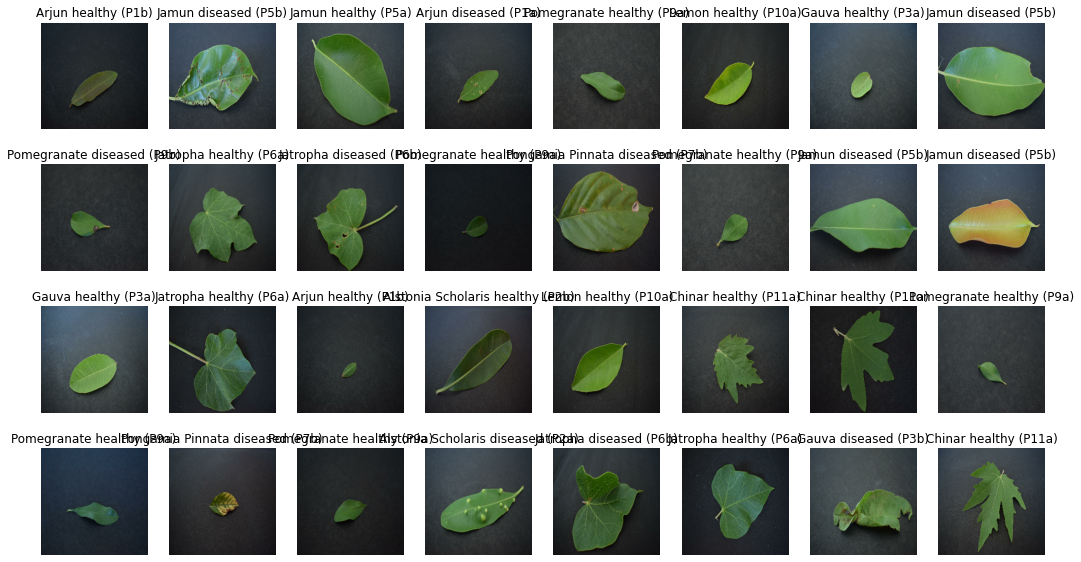

In [13]:
class_names = train_dataset.class_names

plt.figure(figsize=(18, 10))

# Assumes dataset batch_size is at least 32.
num_rows = 4
num_cols = 8

# Here we use the take() method to retrieve just the first batch of data from the training portion of the dataset.
for data_batch, labels_batch in train_dataset.take(1): 
    
    # For the batch of images and the associated (one-hot encoded) labels, 
    # plot each of the images in the batch and the associated ground truth labels.
    for i in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        truth_idx = np.nonzero(labels_batch[i].numpy())
        plt.title(class_names[truth_idx[0][0]])
        plt.axis("off")
        
# To loop through all batches in the dataset, use:
# for data_batch, labels_batch in train_dataset:

### Define Model

In [14]:
# Define the model.
def cnn_model(input_shape=(224, 224, 3), num_classes=22):
    
    #----------------------------------------------
    # Input layer and Conv Block 1: 32-32-MaxPool.
    #----------------------------------------------
    inputs = keras.Input(shape=input_shape)
    
    x = layers.Rescaling(1./255)(inputs)
    
    x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2, strides=2)(x)

    #-----------------------------------
    # Conv Block 2: 64-64-MaxPool.
    #-----------------------------------
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2, strides=2)(x)

    #-----------------------------------
    # Conv Block 3: 128-128-MaxPool.
    #-----------------------------------
    x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2, strides=2)(x)

    #-----------------------------------
    # Conv Block 4: 256-256-MaxPool.
    #-----------------------------------
    x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2, strides=2)(x)

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    x = layers.Flatten()(x)
    
    # Fully connected layers.
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

In [15]:
# Define the input shape.
input_shape = (data_config.IMG_HEIGHT, data_config.IMG_WIDTH, data_config.NUM_CHANNELS)

# Create the model.
model = cnn_model(input_shape=input_shape, num_classes=data_config.NUM_CLASSES)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                             

In [16]:
# Compile the model.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=training_config.LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [18]:
# Create a model checkpoint callback to save the "best" model based on highest validation_accuracy.
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=training_config.CHECKPOINT_DIR,
#                                                               save_weights_only=False,
#                                                               monitor="val_accuracy",
#                                                               mode="max",
#                                                               save_best_only=True,
#                                                              )

# Train the model.
training_results = model.fit(train_dataset,
                             epochs=training_config.EPOCHS,
                             validation_data=valid_dataset,
                             workers=4,
                             use_multiprocessing=True,
                             #callbacks=model_checkpoint_callback,
                            )

Epoch 1/21
134/134 [==============================] - 269s 2s/step - loss: 2.2695 - accuracy: 0.2894 - val_loss: 1.9327 - val_accuracy: 0.3727
Epoch 2/21
134/134 [==============================] - 258s 2s/step - loss: 1.2566 - accuracy: 0.5831 - val_loss: 1.7483 - val_accuracy: 0.5091
Epoch 3/21
134/134 [==============================] - 257s 2s/step - loss: 0.8740 - accuracy: 0.7188 - val_loss: 1.4744 - val_accuracy: 0.6182
Epoch 4/21
134/134 [==============================] - 255s 2s/step - loss: 0.6121 - accuracy: 0.7976 - val_loss: 1.6178 - val_accuracy: 0.5818
Epoch 5/21
134/134 [==============================] - 252s 2s/step - loss: 0.4790 - accuracy: 0.8421 - val_loss: 1.3403 - val_accuracy: 0.6636
Epoch 6/21
134/134 [==============================] - 253s 2s/step - loss: 0.3344 - accuracy: 0.8900 - val_loss: 1.5851 - val_accuracy: 0.6727
Epoch 7/21
134/134 [==============================] - 254s 2s/step - loss: 0.2487 - accuracy: 0.9162 - val_loss: 1.6384 - val_accuracy: 0.6909

In [19]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, training_config.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show(block=block_plot)
    plt.close()

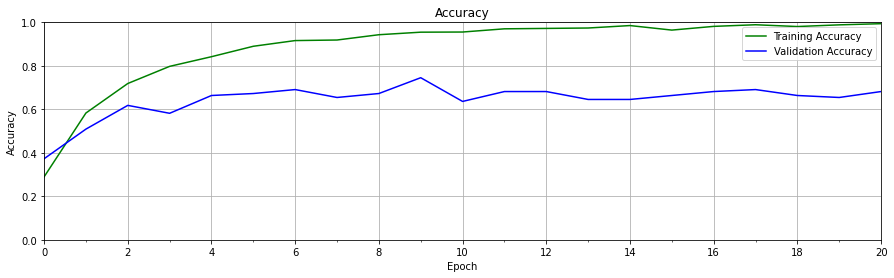

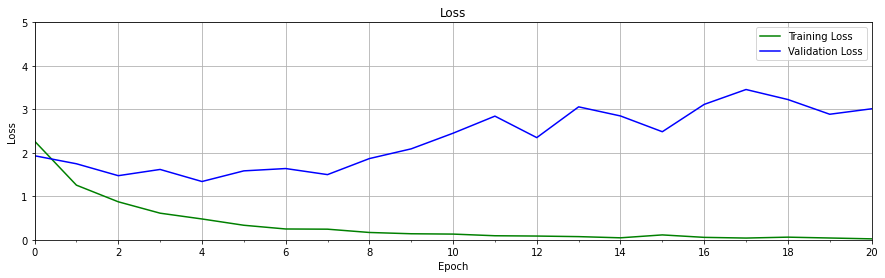

In [20]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]
    
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

### Model Evaluate

In [21]:
valid_loss, valid_acc = model.evaluate(valid_dataset)
print(f"Validation accuracy: {valid_acc:.3f}")

4/4 [==============================] - 6s 61ms/step - loss: 3.0124 - accuracy: 0.6818
Validation accuracy: 0.682


In [22]:
def evaluate_model(dataset, model):
    
    num_matches = 0
    plt.figure(figsize=(17, 12))
    num_rows = 5
    num_cols = 6
    class_names = dataset.class_names
    
    # Retrieve a single batch.
    for data_batch, labels_batch in dataset.take(1):
        
        predictions = model.predict(data_batch)
        
        for idx in range(num_rows*num_cols):
            ax = plt.subplot(num_rows, num_cols, idx + 1)
            plt.axis("off")
            plt.imshow(data_batch[idx].numpy().astype("uint8"))

            pred_idx = tf.argmax(predictions[idx]).numpy()
            truth_idx = np.nonzero(labels_batch[idx].numpy())
            
            title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
            title_obj = plt.title(title, fontdict={'fontsize':11})
            
            if pred_idx == truth_idx:
                num_matches += 1
                plt.setp(title_obj, color='g')
            else:
                plt.setp(title_obj, color='r')
                
            acc = num_matches/(idx+1)
        print("Prediction accuracy: ", int(100*acc)/100)
    
    return

1/1 [==============================] - 0s 27ms/step
Prediction accuracy:  0.6


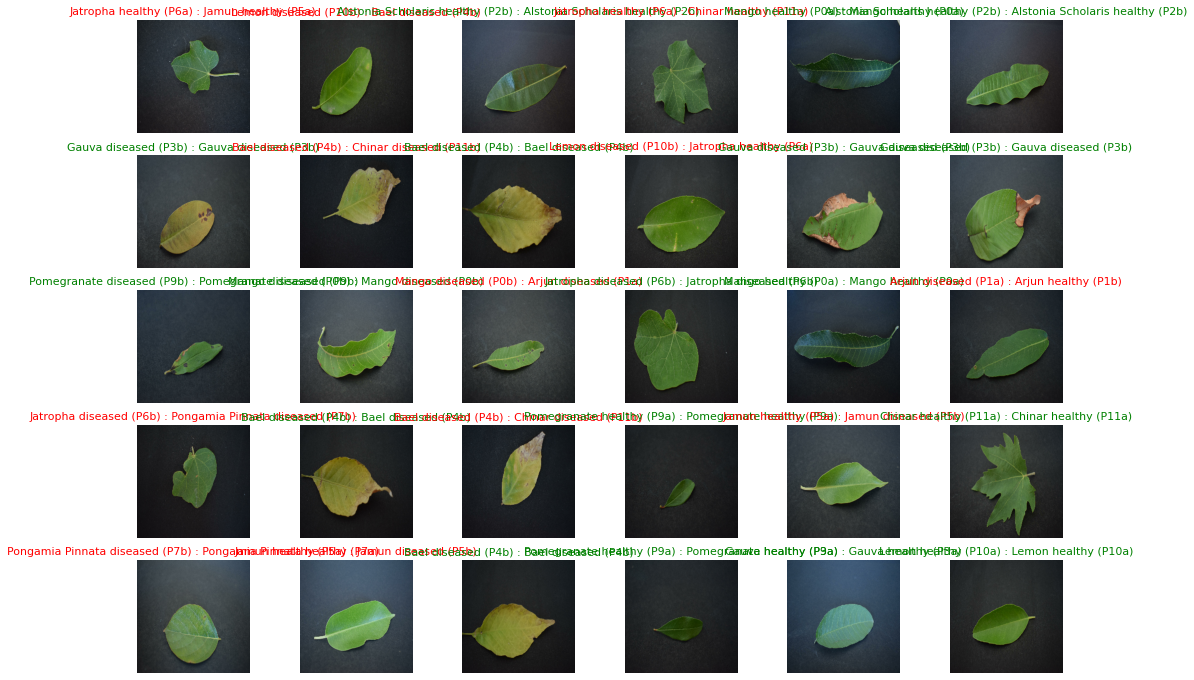

In [26]:
 plot_eval_model = evaluate_model(valid_dataset, model)